# Econometrics Project

BEITZ Enguerrand - YETNA Kam Osiris 

IMPORTS

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import t
from scipy.stats import f
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# PART 1 - CROSS-SECTION DATA 

1) State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased. 


Let $Y_i = \beta_0 + \sum_{K=1}^{n} {(X_{i,K}*\beta_K)}  + u_i$; for $i\in[1,n]$ $\newline$
with : $\newline$
$Y = (Y_1,\ldots, Y_n, Y_{n+1})'$, the dependant variable $\newline$
$X = (1, X_1,\ldots,X_n)'$, the independant variable $\newline$
$u = (u_1,\ldots, u_{n+1})'$,, the error $\newline$
$\beta = (\beta_0,\ldots, \beta_n)'$,
E the operator of esperence

We have, with this notations: $Y=X'*\beta + u$

The fundamental hypothesis under which OLS estimators are unbiased is : $\boxed{EX'u = \mathbb{E}(u|X) = 0}$

2) Show that under this assumption the OLS estimators are indeed unbiased. 

Let’s take the same notations as in question 1.

We have : $Y=X'*\beta + u$

OLS estimates are obtained by solving the following minimization problem : 

$$Min_\beta \sum_{i=1}^{n} {u’_{i} u_{i}} = u’u = (y-X\beta)’ (y-X\beta)$$

The first-order condition is (by deriving the function above):

$$-2X’ (y-X\beta) = 0$$

Re-arranging terms gives:

$$(X’X) \beta = X’ y$$

If there is no multi-collinearity then matrix (X’X) can be inverted and : 

$$\hat{\beta} = (X’X)^{-1} X’y$$

As a consequence, we have:

$$E \hat{\beta} = E(X’X)^{-1} X’ (X\beta + u) = \beta + EX’u = \beta \quad \text{  if the fundamental assumption $EX’u = 0$ is satisfied}$$

All in all, the OLS estimator is unbiased if the fundamental assumption is satisfied.

3) Explain the sample selection bias with an example from the course.

A sample selection bias occurs when used for a study is not representative of the population we want to study. There is a distortion between the composition of the sample and the real population, which can lead to biased conclusions. 

Here is an example of a specific sample selection bias, which is the survival bias: this occurs when the sample is composed solely of those who survived a certain event or period. This can lead to an under-representation of individuals who did not survive, which distorts the results.

Example: Assume a study which examines the relationship between the growth rate and size of companies. The Gibrat law argues that if growth is independent of size, the distribution of observed company sizes should align with the general distribution. However, early empirical studies indicate a negative relationship between growth and company size, possibly due to only the small, highly dynamic companies surviving in the market. This introduces a survival bias, as the sample includes only those companies that have survived, neglecting those that exited the market, potentially leading to inaccurate conclusions about the relationship between growth and size.


4) Explain the omitted variable bias with an example from the course

Omitted variable bias occurs when a relevant variable that influences both the variable we are trying to predict, and the variable used to predict it is not included in the model. 

Example: Assume that the objective is to investigate the impact of fertilizers on soybean agricultural yields. However, that yield depends on a great number of other factors, such as climate, soil quality, presence of pests, etc. When selecting plots of land for the experiment, not all these other factors are considered in the analysis. If fertilizers are systematically applied to the better plots, it can lead to an overestimation of the impact of fertilizers on yield, as the better plots may naturally produce higher yields independently of the fertilizer effect.


5) Explain the problem of multicollinearity. Is it a problem in this dataset?

$\underline{\text{The problem of multicollinearity arises when we want to calculate variances or standard deviations.}} $

If we Assume homoscedasticity i.e for $i \in[1,n] $;  $Var(u_i|x_i)=\sigma^2$ $\newline$
Let's show that: $Var(b|X) = \sigma^2(X'X)^{-1}$; 

$Var(b | X) = Var((X'X)^{-1} X'(X \beta + u)|X)$

$Var(b | X) = 0 + (X'X)^{-1} X' Var(u|X) X(X'X)^{-1}$

$\boxed{Var(b | X) = \sigma ^{2}(X'X)^{-1}}$

The problem of multicollinearity arises when X'X is close to 0.

This problem occurs when two or more columns of X are (quasi) linearly dependent.

Thus, $det(X'X) = 0$ (or close)

So it's difficult to calculate the inverse of X'X.

In the dataset on which we are working, there is a problem of multicollinearity because by looking the dataset 'HPRICE2.raw', we notice that columns radial,proptax and stratio are quasi independant

6) Create three categories of nox levels (low, medium, high), corresponding to the following
percentiles: 0-25%, 26%-74%, 75%-100%

In [3]:
df = pd.read_csv('HPRICE2.raw', sep='\s+', header=None)
df.columns = ['price', 'crime', 'nox', 'rooms', 'dist', 'radial', 'proptax', 'stratio', 'lowstat', 'lprice', 'lnox', 'lproptax']

percentiles = df['nox'].quantile([0, 0.25, 0.75, 1.0]).tolist()

df['nox_category'] = pd.cut(df['nox'], bins=percentiles, labels=['low', 'medium', 'high'])
df

,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_category
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,medium
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,medium
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,medium
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22400,0.063,5.73,6.59,2.48,1,27.3,21.0,9.67,10.016820,1.745715,5.609472,medium
502,20600,0.045,5.73,6.12,2.29,1,27.3,21.0,9.08,9.933046,1.745715,5.609472,medium
503,23899,0.061,5.73,6.98,2.17,1,27.3,21.0,5.64,10.081590,1.745715,5.609472,medium
504,22000,0.110,5.73,6.79,2.39,1,27.3,21.0,6.48,9.998797,1.745715,5.609472,medium


7) Compute for each category of nox level the average median price and comment on your
results

In [4]:
avg_price = df.groupby('nox_category')['price'].mean()
print(avg_price)

nox_category
low       27031.244094
medium    22741.555118
high      17430.653226
Name: price, dtype: float64


The average price is decreasing when nox_category level increase. So, the nox percentage has an effect on the price.

8) Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect?

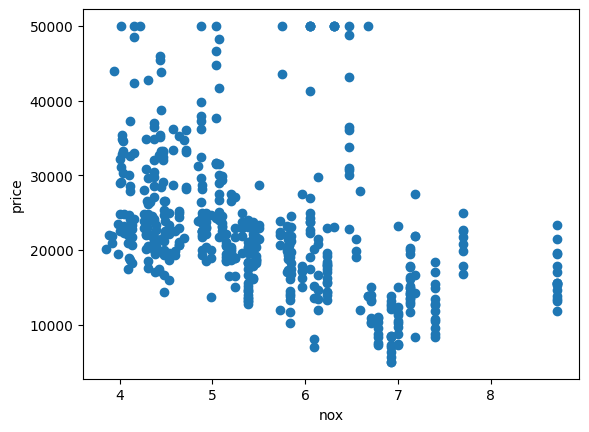

In [5]:
plt.scatter(df['nox'], df['price'])
plt.xlabel('nox')
plt.ylabel('price')
plt.show()

By producing a scatter plot with the variable price and the variable nox, we assume that there is a ceteris p  aribus effect.
However the graph shows that for a same level of nox, several median housing prices are possible.
As a conclusion, it is not a ceteris paribus effect i.e characteritics other than level of nox influence median housing prices.

9) Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        11:27:22   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant   -1.868e+04   3215.205     -5.811      0.0

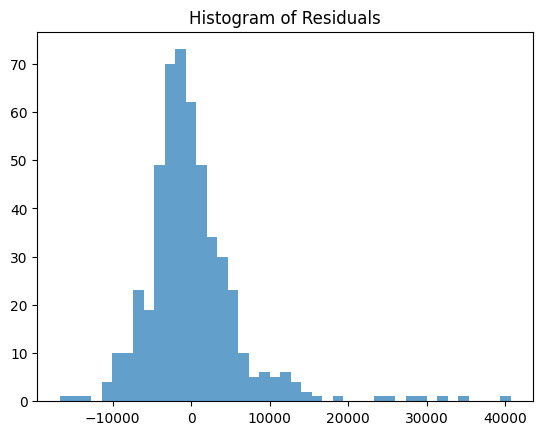

In [6]:
df['constant'] = 1
X = df[['constant', 'crime', 'nox', 'rooms', 'proptax']]
Y = df['price']
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
residuals = results.resid

plt.hist(residuals, bins='auto', alpha=0.7)
plt.title('Histogram of Residuals')
plt.show()



$\underline{\textbf{Interpretation of all coefficient:}}$
 
The histogram almost has a bell-shaped distribution, which suggests that the residuals are approximately normally distributed. Nonotheless, the gaussian is not centered. The range of values is [-15000, 40000] with the top of the "bell" reached in [-2000, O].



$\underline{\textbf{Interpretation of all coefficient:}}$



10) Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients.

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        11:27:22   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       8.6550      0.137     63.320      0.0

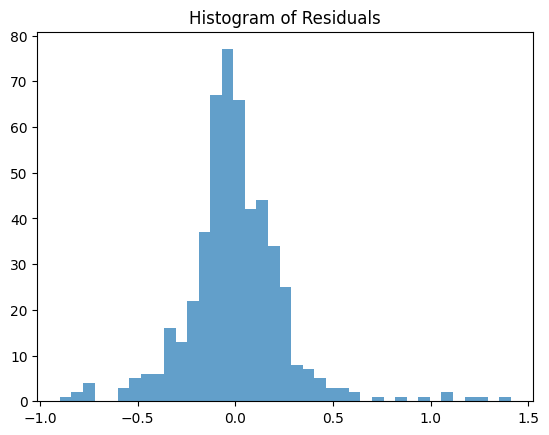

In [7]:
df['constant'] = 1
X = df[['constant', 'crime', 'nox', 'rooms', 'proptax']]
Y = df['lprice']
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
residuals = results.resid

plt.hist(residuals, bins='auto', alpha=0.7)
plt.title('Histogram of Residuals')
plt.show()


11) Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients.

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.77e-101
Time:                        11:27:22   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       9.7505      0.253     38.476      0.0

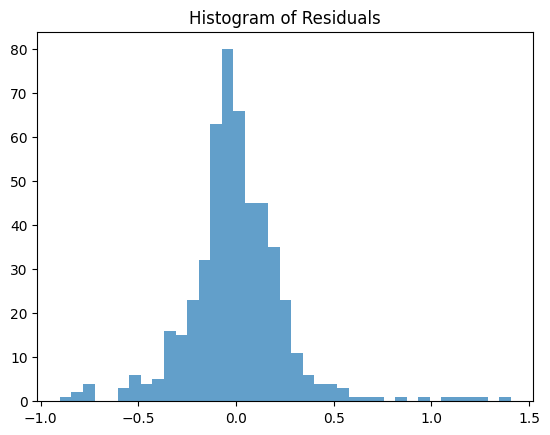

In [8]:
df['constant'] = 1
X = df[['constant', 'crime', 'lnox', 'rooms', 'lproptax']]
Y = df['lprice']
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
residuals = results.resid

plt.hist(residuals, bins='auto', alpha=0.7)
plt.title('Histogram of Residuals')
plt.show()


12) In the specification of question 10, test the hypothesis $H_0: \beta_{nox}$ <0 vs. $H_1: \beta_{nox}$ > 0 at the 1% level

Let's test H0 hypothesis using Student statistique as we have seen in class.

In [9]:
# Fit the model
df['constant'] = 1
X = pd.DataFrame(np.column_stack((df['constant'], df['crime'], df['nox'], df['rooms'], df['proptax'])), 
                 columns=['constant', 'crime', 'nox', 'rooms', 'proptax'])
Y = df['lprice']
model = sm.OLS(Y, X)
results = model.fit()

# Get the t-statistic for 'nox'
t_stat = results.tvalues['nox']

# Get the critical value for a one-sided test at the 1% level
critical_value = t.ppf(1-0.01, df=results.df_resid)

# Check the hypothesis
if t_stat < critical_value:
    print("We accept the null hypothesis, so beta_nox < 0")
else:
    print("We reject the null hypothesis, so beta_nox > 0")

We accept the null hypothesis, so beta_nox < 0


13) In the specification of question 10, test the hypothesis H0: $\beta_{nox} = 0$ vs H1: $\beta_{nox}$ ≠ 0 at the 1% level using the p-value of the test

Let's test H0 hypothesis with statistic of Fisher

In [10]:
#Calculation of the sum of squared errors of the unconstrained model.
df['constant'] = 1
X = np.column_stack((df['constant'], df['crime'], df['nox'], df['rooms'], df['proptax']))
Y = df['lprice']
model = sm.OLS(Y, X)
results = model.fit()
u = results.resid
SSR0 = np.dot(u.T, u)

#Calculation of the sum of squared errors of the constrained model.
#test the hypothesis $H_0: \beta_{nox}$ =0
df['constant'] = 1
X1 = np.column_stack((df['constant'], df['crime'], df['rooms'], df['proptax']))
Y = df['lprice']
model = sm.OLS(Y, X1)
results = model.fit()
u = results.resid
SSR1 = np.dot(u.T, u)

#Calculation of the Fisher statistic
n,k=np.shape(X)
F=((SSR1-SSR0)/1)/(SSR0/(n-k))
p_value = f.sf(F,1,n-k)

print("p_value = ", p_value)

# Check the hypothesis
if p_value < 0.01:
    print("Reject H0, so beta_nox != 0")
else:
    print("We accept H0, so beta_nox = 0")


p_value =  0.0004106959052555669
Reject H0, so beta_nox != 0


14) In the specification of question 10, test the hypothesis $H_0$: $\beta_{crime} = \beta_{proptax}$ at the 10% level

Let's test the null hypothesis using Fisher Statistic and the p_value has we have seen in TP $\newline$



Before that, we need to make few changes in the expression of H0 hypothesis and in the formulation of Y.$\newline$
Let $\theta = \beta_{crime}-\beta_{proptax}$
$$
H_O \iff (\theta = \beta_{crime}-\beta_{proptax} = 0)
$$
So, the hypothesises we will test are
$$
\boxed{H_0: {\theta = 0} \quad VS \quad H_1:{\theta \neq 0}}
$$

To test the null hypothesis we need to change the expression of Y.

$$
Y = \beta_0 + \beta_{nox}*X_{nox} + \beta_{rooms}*X_{rooms} + \beta_{crime}*X_{crime} + \beta_{proptax}*X_{proptax} + u
$$

So,
$$
\boxed{Y =\beta_0 + \beta_{nox}*X_{nox} + \beta_{rooms}*X_{rooms} + \theta*X_{crime} + \beta_{proptax}*(X_{proptax}+X_{crime}) + u }
$$


In [11]:
# Calculation of the sum of squared errors of the new constrained model.
# Test the hypothesis $H_0: \theta = 0$
df['constant'] = 1
X1 = np.column_stack((df['constant'], df['nox'], df['rooms'], df['proptax'] + df['crime']))
Y = df['lprice']
model = sm.OLS(Y, X1)
results = model.fit()
u = results.resid
SSR1 = np.dot(u.T, u)

# Calculation of the Fisher statistic
n, k = np.shape(X)
F = ((SSR1 - SSR0) / 1) / (SSR0 / (n - k))
p_value = f.sf(F, 1, n - k)

print("p_value = ", p_value)

# Check the hypothesis
if p_value < 0.1:
    print("Reject H0, so theta != 0 and beta_nox != beta_proptax")
else:
    print("We accept H0, so theta = 0 and beta_nox = beta_proptax")

p_value =  0.00032020806460918383
Reject H0, so theta != 0 and beta_nox != beta_proptax


15) In the specification of question 10, test the hypothesis H0: $\beta_{nox} = 0$, $\beta_{proptax} = 0$ at the 10% level

Let's test the null hypothesis using Fisher Statistic and the p_value has we have seen in TP $\newline$

In [12]:
#Calculation of the sum of squared errors of the new constrained model.
#test the hypothesis $H_0: \beta_{nox}$ =0
df['constant'] = 1
X1 = np.column_stack((df['constant'], df['crime'], df['rooms']))
Y = df['lprice']
model = sm.OLS(Y, X1)
results = model.fit()
u = results.resid
SSR1 = np.dot(u.T, u)

#Calculation of the Fisher statistic
n,k=np.shape(X)
F=((SSR1-SSR0)/2)/(SSR0/(n-k))
p_value = f.sf(F,2,n-k)

print("p_value = ", p_value)

# Check the hypothesis
if p_value < 0.1:
    print("Reject H0, so the assertion {beta_nox=0,beta_proptax=0} is false")
else:
    print("We accept H0, so{beta_nox=0,beta_proptax=0} is true")


p_value =  2.5293764225613786e-14
Reject H0, so the assertion {beta_nox=0,beta_proptax=0} is false


16) In the specification of question 10, test the hypothesis H0: $\beta_{nox}$ = -500, $\beta_{proptax}$ = -100 at the 10% level using the p-value of the test

Let's test the null hypothesis using Fisher Statistic and the p_value has we have seen in TP $\newline$

In [13]:
#Calculation of the sum of squared errors of the new constrained model.
#test the hypothesis $H_0: \beta_{nox}$ =0
df['constant'] = 1
X1 = np.column_stack((df['constant'], df['crime'], df['rooms']))
Y1 = df['lprice'] + 500*df['nox'] + 100*df['proptax']
model = sm.OLS(Y1, X1)
results = model.fit()
u = results.resid
SSR1 = np.dot(u.T, u)

#Calculation of the Fisher statistic
n,k=np.shape(X)
F=((SSR1-SSR0)/2)/(SSR0/(n-k))
p_value = f.sf(F,2,n-k)

print("p_value = ", p_value)

# Check the hypothesis
if p_value < 0.1:
    print("Reject H0, so the assertion {beta_nox=-500,beta_proptax=-100} is false")
else:
    print("We accept H0, so {beta_nox=-500,beta_proptax=-100} is true")


p_value =  0.0
Reject H0, so the assertion {beta_nox=-500,beta_proptax=-100} is false


17) In the specification of question 10, test the hypothesis H0: $\beta_{nox} + \beta_{proptax}$ = -1000 at the 10%
level using the p-value of the test

Let's test the null hypothesis using Fisher Statistic and the p_value has we have seen in TP $\newline$



Before that, we need to make few changes in the expression of H0 hypothesis and in the formulation of Y.$\newline$
Let $\theta = \beta_{nox}+\beta_{proptax}$
$$
H_O \iff (\theta = \beta_{nox}+\beta_{proptax} = -1000)
$$
So, the hypothesises we will test are
$$
\boxed{H_0: {\theta = -1000} \quad VS \quad H_1:{\theta \neq -1000}}
$$

To test the null hypothesis we need to change the expression of Y.

$$
Y = \beta_0 + \beta_{nox}*X_{nox} + \beta_{rooms}*X_{rooms} + \beta_{crime}*X_{crime} + \beta_{proptax}*X_{proptax} + u
$$

So,
$$
\boxed{Y =\beta_0 + \beta_{crime}*X_{crime} + \beta_{rooms}*X_{rooms} + \theta*X_{nox} + \beta_{proptax}*(X_{proptax}-X_{nox}) + u }
$$


In [14]:
# Calculation of the sum of squared errors of the new constrained model.
# Test the hypothesis $H_0: \theta = 0$
df['constant'] = 1
X1 = np.column_stack((df['constant'], df['crime'], df['rooms'], df['proptax'] - df['nox']))
Y1 = df['lprice'] + 1000*df['nox']
model = sm.OLS(Y1, X1)
results = model.fit()
u = results.resid
SSR1 = np.dot(u.T, u)

# Calculation of the Fisher statistic
n, k = np.shape(X)
F = ((SSR1 - SSR0) / 1) / (SSR0 / (n - k))
p_value = f.sf(F, 1, n - k)

print("p_value = ", p_value)

# Check the hypothesis
if p_value < 0.1:
    print("Reject H0, so theta != 0 and beta_nox + beta_proptax !=-1000")
else:
    print("We accept H0, so theta = 0 and beta_nox + beta_proptax =-1000")

p_value =  0.0
Reject H0, so theta != 0 and beta_nox + beta_proptax !=-1000


18) In the specification of question 10, test the hypothesis that all coefficients are the same for
observations with low levels of nox vs. medium and high levels of nox.

 # PART 2 - HETEROSKEDASTICITY

20)  Explain the problem of heteroskedasticity with an example of the course.

Heteroskedasticity describes a situation where the standard deviation of the errors in a regression model is not constant across all values of the independent variable.

In other words, heteroskedasticity occurs when the dispersion of errors is not the same for all observations in a regression model. This can lead to problems in statistical tests and in the efficiency of estimators of model parameters.

Let's consider an example to illustrate heteroscedasticity in a linear regression model. Let's assume the following model : 

$y_i = \beta_0 + \sum_{k=1}^{K} \beta_k x_{ik} + u_i$

where:

  $y_i$ is the dependent variable,

  $x_{ik}$ is the k-th independent variable for observation i,

  $\beta_0$ is the intercept,

  $\beta_k$ is the coefficient for the k-th independent variable,
  
  $u_i$ is the error term.

Now, let's introduce heteroscedasticity by assuming that the variance of the error terms $u_i$ depends on the values of the independent variables.

$\text{Var}(u_i | x_{i1}, x_{i2}, ..., x_{iK}) = \sigma_i^2$

where $\sigma_i^2$ is the conditional variance depending on the values of the independent variables.

A simple example of a heteroscedastic specification could be:

$\sigma_i^2 = x_{i1}^2 + x_{i2}^2 + ... + x_{iK}^2$

In this example, the variance of errors $\sigma_i^2$ depends on the squares of the independent variables $x_{ik}$. This could lead to an increasing dispersion of errors as the values of the independent variables increase.

The complete specification of the model would then be:

$y_i = \beta_0 + \sum_{k=1}^{K} \beta_k x_{ik} + u_i$

$\text{Var}(u_i | x_{i1}, x_{i2}, ..., x_{iK}) = x_{i1}^2 + x_{i2}^2 + ... + x_{iK}^2$


21) Suppose that Euu' = $\sigma^2*\Omega$. Show that the GLS estimator is the best linear unbiased estimator.

Let's $\hat\beta_{GLS} = (X'\Omega^{-1}X)^{-1}X'\Omega^{-1}Y$

With $Y =X\beta + u$

The Generalized Least Squares (GLS) estimator is considered the Best Linear Unbiased Estimator (BLUE) under the assumption of heteroskedasticity or correlation among the error terms. Here's why:

1. **Linearity**: The GLS estimator is a linear function of the dependent variable Y. (Obviously)

2. **Unbiasedness**: The expectation of the GLS estimator is equal to the true parameter value.

$$
\mathbb{E}(\hat\beta_{GLS})= \mathbb{E}((X'\Omega^{-1}X)^{-1}X'\Omega^{-1}Y)= (X'\Omega^{-1}X)^{-1}X'\Omega^{-1}\mathbb{E}(Y)
$$
$$
(X'\Omega^{-1}X)^{-1}X'\Omega^{-1}\mathbb{E}(X\beta+u) = (X'\Omega^{-1}X)^{-1}X'\Omega^{-1}X\mathbb{E}(\beta)
$$

$$
\boxed{\text{As a consequence } \mathbb{E}(\hat\beta_{GLS})=\beta }
$$

3. **Efficiency**: Among all linear unbiased estimators, the GLS estimator has the smallest variance.


22. In the specification of question 9 (not 10), test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test H0: $\delta_{crime}, \delta_{nox}, \delta_{room}, \delta_{proptax} = 0$, where the coefficients $\delta_{k}$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.

***We make a test at 5% ***

In [22]:
#Calcul of u2
df['constant'] = 1
X = np.column_stack((df['constant'], df['crime'], df['nox'], df['rooms'], df['proptax']))
Y = df['price']

model = sm.OLS(Y, X)
results = model.fit()
u = results.resid
u2 = u**2
y = u2

#Calcul of the F-statistic with R-squared
second_model = sm.OLS(y, X)
results2 = second_model.fit()
R2_1 = results2.rsquared

n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

#Check the hypothesis

if p_value < 0.05:
    print("Reject H0, so the null hypothesis is false: there is heteroskedasticity")
else:
    print("We accept H0, so the null hypothesis is true: there is no heteroskedasticity")



Reject H0, so the null hypothesis is false: there is heteroskedasticity


23) In the specification of question 10 (not 11), test the hypothesis of no heteroskedasticity of linear form

In [23]:
df['constant'] = 1
X = np.column_stack((df['constant'], df['crime'], df['nox'], df['rooms'], df['proptax']))
Y = df['lprice']

model = sm.OLS(Y, X)
results = model.fit()
u = results.resid
u2 = u**2
y = u2

#Calcul of the F-statistic with R-squared
second_model = sm.OLS(y, X)
results2 = second_model.fit()
R2_1 = results2.rsquared

n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

#Check the hypothesis

if p_value < 0.05:
    print("Reject H0, so the null hypothesis is false: there is heteroskedasticity")
else:
    print("We accept H0, so the null hypothesis is true: there is no heteroskedasticity")

Reject H0, so the null hypothesis is false: there is heteroskedasticity


24) In the specification of question 11 (not 12), test the hypothesis of no heteroskedasticity of linear form

In [24]:
df['constant'] = 1
X = np.column_stack((df['constant'], df['crime'], df['lnox'], df['rooms'], df['lproptax']))
Y = df['lprice']

model = sm.OLS(Y, X)
results = model.fit()
u = results.resid
u2 = u**2
y = u2

#Calcul of the F-statistic with R-squared
second_model = sm.OLS(y, X)
results2 = second_model.fit()
R2_1 = results2.rsquared

n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

#Check the hypothesis

if p_value < 0.05:
    print("Reject H0, so the null hypothesis is false: there is heteroskedasticity")
else:
    print("We accept H0, so the null hypothesis is true: there is no heteroskedasticity")

Reject H0, so the null hypothesis is false: there is heteroskedasticity


25) Comment on the differences between your results of questions 22,23, 24.

26) Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.

In [21]:
columns = ['constant', 'crime', 'nox', 'rooms', 'proptax']
df['constant'] = 1
X = np.column_stack((df['constant'], df['crime'], df['nox'], df['rooms'], df['proptax']))
Y = df['price']

model = sm.OLS(Y, X)
results = model.fit()
u = results.resid
u2 = u**2
y = u2

second_model = sm.OLS(y, X)
results = second_model.fit()
print(results.summary())

tvalues_abs = np.abs(results.tvalues)
max_tvalue_index = np.argmax(tvalues_abs)
significant_variable = columns[max_tvalue_index]
print(significant_variable)

weights = np.sqrt(df[significant_variable])
model_wls = sm.WLS(Y, X, weights=weights)
results_wls = model_wls.fit()
print(results_wls.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.47e-05
Time:                        18:32:32   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

# PART 3 - TIME SERIES DATA

In [8]:
df = pd.read_excel(
    "threecenturies_v2.3.xlsx",
    sheet_name="A1. Headline series",
    usecols=[1, 15, 28],
)

realGDP = df.iloc[246:347, 0].reset_index(drop=True)
unemployment_rate = df.iloc[246:347, 1].reset_index(drop=True)
consumer_price_inflation = df.iloc[246:347, 2].reset_index(drop=True)

df = pd.DataFrame(
    {"realGDP": realGDP, "unemployment_rate": unemployment_rate, "consumer_price_inflation": consumer_price_inflation}
)
print (df)

           realGDP unemployment_rate consumer_price_inflation
0    181160.264436          3.679865                 4.058273
1    184974.529384          4.877351                     -0.3
2    187756.550527          5.145694                        0
3     186015.76815          5.603507                  1.10331
4    188155.559259          6.914821                -0.396825
..             ...               ...                      ...
96         1243709          8.097052                 2.400308
97         1282602          6.972014                 1.824606
98         1323527          6.255467                 1.557398
99         1366983          5.976813                  1.32871
100        1418176          5.459049                 0.796456

[101 rows x 3 columns]


27) Define strict and weak stationarity.

***Strict stationarity*** the joint distribution of (ys+1, ys+2, …, ys+T) does not depend on s; the future and the past resemble each other.

***Weak stationarity*** (or weak-sense stationarity) requires that only the mean, variance, and autocorrelation structure remain constant over time.
cov(x_t,x_{t+h}) only depends on h, the time difference (not on the specific values of t and t+k.)

28) Explain ergodicity and state the ergodic theorem. Illustrate with an example.

***Ergodicity*** There is ergodicity when the process forgets the initial conditions: the autocorrelation of order k tends toward 0 as k approaches infinity.

***Ergodic theorem***  If {$y_t$} is strictly stationary and ergodic, and $\mathbb{E}(y_t) <\infty$ as $T \to \infty$, then the time average converges to the spatial average (Expectation).
$$\lim_{{T \to \infty}} \frac{1}{T} \sum_{{t=1}}^{T} y_t = \mathbb{E}[y_t]
$$

***Exemple*** 
Consider a fair six-sided die. Each time you roll the die, you obtain a random outcome between 1 and 6. Now, imagine rolling the die repeatedly and recording the outcomes. The process is ergodic because, over a large number of rolls, the average value of the outcomes will converge to the expected value of a single roll, which is $(\frac{1+2+3+4+5+6}{6} = 3.5)$. This illustrates the convergence of time average to ensemble average in an ergodic system.


29) Why do we need both stationarity and ergodicity?

TO ENSURE that our sample mean is a good approximation of the real mean

30) Explain “spurious regression”.

Spurious correlation occurs when there is a statistically significant correlation between two variables, not because of a causal relationship, but possibly due to their dependence on an unobserved factor.

Let's take an example in a cross-sectional environment. If we perform a regression of variable y on x, we may find a significant relationship. However, when we introduce another variable, such as z, and control for it, the partial effect of x on y diminishes to zero.

This leads to the formulation of the spurious regression problem: an issue emerges in regression analysis when it falsely suggests a connection between two or more unrelated time series processes due to the presence of trends in each, being integrated time series (like a random walk), or a combination of both.

31) Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average.

A moving average is a statistical method used to analyze data points over a defined period by calculating a series of averages of different subsets of the complete dataset. It is used to smooth out short-term fluctuations and highlight longer-term trends in time series.

Trade-off involved in the choice of the size of the window : 

A larger window results in smoother averages, reducing sensitivity to short-term fluctuations but potentially delaying the identification of recent changes. A smaller window provides a more responsive moving average but may introduce more variability.

Trade-off involved in the choice of wether to center or not the moving average : 

A centered average uses an equal number of observations on each side of the target point, providing a balanced view. In contrast, a non-centered average, with an odd number of observations, may be more responsive to recent changes but introduces bias by giving unequal weight to certain observations.

32) Make all time series stationary by computing the difference between the original variable and a moving average of order 10.

In [27]:
#Compute the moving averages
df["realGDP_MA_10"] = df["realGDP"].rolling(window=10).mean()
df["unemployment_MA_10"] = df["unemployment_rate"].rolling(window=10).mean()
df["inflation_MA_10"] = df["consumer_price_inflation"].rolling(window=10).mean()

#Compute the differences
df["realGDP_stationary_10"] = df["realGDP"] - df["realGDP_MA_10"]
df["unemployment_stationary_10"] = df["unemployment_rate"] - df["unemployment_MA_10"]
df["inflation_stationary_10"] = df["consumer_price_inflation"] - df["inflation_MA_10"]

33) Compute the difference between the resulting time series of question 32 and a moving average of order 5. Give the exact formula for the weights after the two transformations.

In [31]:
df['realGDP_MA_5'] = df['realGDP_stationary_10'].rolling(window=5).mean()
df['unemployment_MA_5'] = df['unemployment_stationary_10'].rolling(window=5).mean()
df['inflation_MA_5'] = df['inflation_stationary_10'].rolling(window=5).mean()  

df['realGDP_stationary_5'] = df['realGDP_stationary_10'] - df['realGDP_MA_5']
df['unemployment_stationary_5'] = df['unemployment_stationary_10'] - df['unemployment_MA_5']
df['inflation_stationary_5'] = df['inflation_stationary_10'] - df['inflation_MA_5']

Weights for the first transformation:  [ 1.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
Weights for the second transformation:  [ 1.  -0.2 -0.2 -0.2 -0.2 -0.2]


Let's $(T)_t$ be the original time serie $\newline$
And $(X)_t$ the final time serie we obtain at the end of all transformations.$\newline$
At the end, we have the relation:

$$X_t = \left( T_t - \frac{1}{10} \sum_{i=0}^{9} T_{t-i} \right) - \frac{1}{5} \sum_{i=0}^{4} \left( T_{t-k} - \frac{1}{10} \sum_{j=0}^{9} T_{t-i-k} \right)$$

$$ =  T_t - \sum_{i=0}^{4} (\frac{1}{10} + \frac{1}{5})T_{t-i}  -  \sum_{i=5}^{9} \frac{1}{10} T_{t-i} +  \sum_{i=0}^{4} \sum_{j=0}^{9} \frac{1}{50}T_{t-i-k} $$

So,

$$
\boxed{X_t = \frac{18}{25}T_t - \frac{13}{50}T_{t-1} - \frac{6}{25}T_{t-2} - \frac{11}{50}T_{t-3}- \frac{1}{5}T_{t-4} +     \frac{2}{25}T_{t-10} + \frac{3}{50}T_{t-11} + \frac{1}{25}T_{t-11} + \frac{1}{50}T_{t-12}}
$$

Let's W be the vector of weight Which is sush that $X_t = W*(Y_t)'$, with $Y_t = [X_t, X_{t-1}, ...,X_{t-12}]'$
after the two transformations :
$$
\boxed{W = [\frac{18}{25}, -\frac{13}{50}, -\frac{6}{25}, -\frac{11}{50}, -\frac{1}{5}, 0, 0, 0, 0, 0, \frac{2}{25}, \frac{3}{50} + \frac{1}{25}, \frac{1}{50}]}
$$


34) Using the original dataset, test the unit root hypothesis for all variables.

In [32]:
variables = ['realGDP', 'unemployment_rate', 'consumer_price_inflation']   

for var in variables:
    result = adfuller(df[var])
    print (var)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject the unit root hypothesis, so the series is stationary")
    else:
        print("We accept the unit root hypothesis, so the series is not stationary")
    print('---------------------------')

realGDP
ADF Statistic for realGDP: 4.334307365243231
p-value: 1.0
We accept the unit root hypothesis, so the series is not stationary
---------------------------
unemployment_rate
ADF Statistic for unemployment_rate: -2.3632029316185594
p-value: 0.15239250945749505
We accept the unit root hypothesis, so the series is not stationary
---------------------------
consumer_price_inflation
ADF Statistic for consumer_price_inflation: -4.0503591672558334
p-value: 0.001168599408868895
Reject the unit root hypothesis, so the series is stationary
---------------------------


35) Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34.

In [33]:
for var in ['realGDP_stationary_10', 'unemployment_stationary_10']:
    result = adfuller(df[var].dropna())
    print (var)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Reject the unit root hypothesis, so the series is stationary")
    else:
        print("We accept the unit root hypothesis, so the series is not stationary")
    print('---------------------------')


result = adfuller(df['realGDP_stationary_5'].dropna())
print ('realGDP_stationary_5')
print(f'ADF Statistic for realGDP_stationary_5: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("Reject the unit root hypothesis, so the series is stationary")
else:
    print("We accept the unit root hypothesis, so the series is not stationary")

print('-------------------------------------------------------------------------------------------------------')
print('consumer_price_inflation is stationary')
print('unemployment_rate is stationary after one transformation')
print('realGDP is stationary after two transformations')

realGDP_stationary_10
ADF Statistic for realGDP_stationary_10: 0.3192341928243904
p-value: 0.9782099331829892
We accept the unit root hypothesis, so the series is not stationary
---------------------------
unemployment_stationary_10
ADF Statistic for unemployment_stationary_10: -3.0790508245352575
p-value: 0.02814286907190101
Reject the unit root hypothesis, so the series is stationary
---------------------------
realGDP_stationary_5
ADF Statistic for realGDP_stationary_5: -5.787467810522686
p-value: 4.960809331820286e-07
Reject the unit root hypothesis, so the series is stationary
-------------------------------------------------------------------------------------------------------
consumer_price_inflation is stationary
unemployment_rate is stationary after one transformation
realGDP is stationary after two transformations


36) Explain the difference between ACF and PACF.

The ACF quantifies the correlation between a time series and its own past values at different time lags. The PACF also assesses the correlation between a time series observation and its past values.

The big difference is that ACF measures the overall correlation, including both direct and indirect influences of past observations; whereas PACF focuses exclusively on the direct correlation, removing the influence of intermediate observations to isolate the unique contribution of each lag.

37) Plot and comment on the ACF and PACF of all variables.

ACF for realGDP: [1.         0.96049378 0.92228356 0.8855185  0.85021983 0.81639742
 0.78331127 0.75092916 0.7205954  0.69090771 0.66009677 0.62672223
 0.59230687 0.55830629 0.52750913 0.49934662 0.47227492 0.44671245
 0.4213243  0.39761013 0.37361842]
PACF for realGDP: [ 1.00000000e+00  9.70098722e-01 -2.98743439e-03  2.79560153e-04
  1.57776168e-03  2.77549211e-03 -9.47501704e-03 -1.00339236e-02
  1.46692216e-02 -9.42598310e-03 -4.27640421e-02 -7.31817167e-02
 -4.98575279e-02 -2.57909334e-02  2.85264296e-02  2.31369968e-02
 -3.64250637e-03  4.92848715e-03 -2.23386937e-02  9.67789630e-03
 -2.63986723e-02]


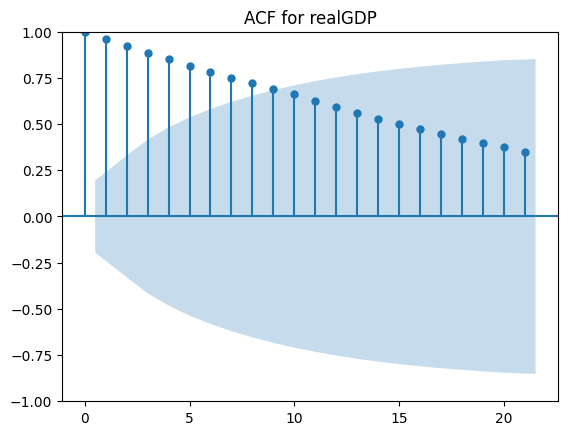

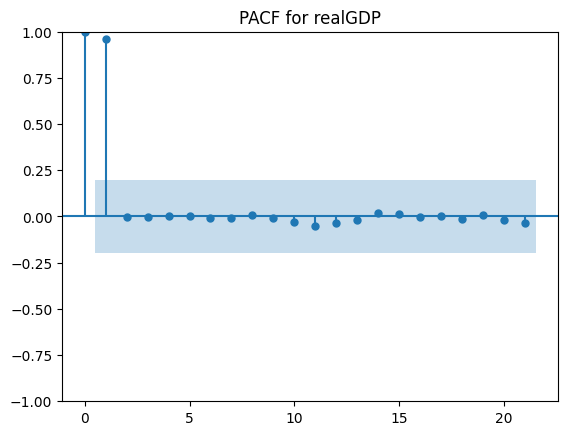

ACF for unemployment_rate: [ 1.          0.91920226  0.81728021  0.70699301  0.61269247  0.52121887
  0.42083932  0.34773318  0.27824269  0.23037079  0.17807704  0.10746165
  0.04148977 -0.03121945 -0.11068643 -0.17693088 -0.21843223 -0.24195072
 -0.28468944 -0.30509263 -0.30355313]
PACF for unemployment_rate: [ 1.          0.92839429 -0.20368049 -0.10593922  0.06807099 -0.07774922
 -0.16041665  0.18712545 -0.09842372  0.06250193 -0.08293592 -0.23801473
  0.02536266 -0.11087909 -0.25769472  0.19556152  0.08922351 -0.13813796
 -0.23894104  0.24058435  0.07026809]


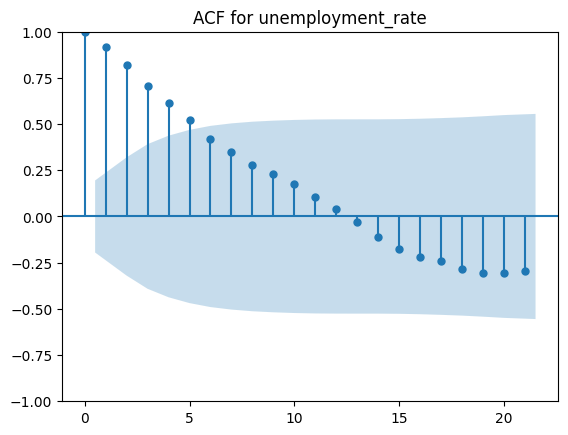

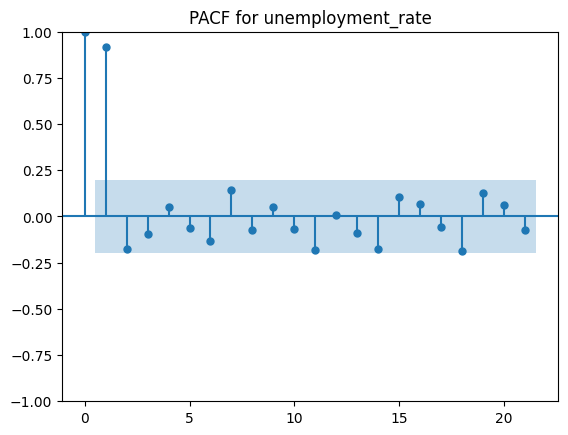

ACF for consumer_price_inflation: [ 1.          0.75405159  0.49782258  0.30101533  0.13768624  0.0559268
 -0.01790011 -0.03995142 -0.02182155 -0.04771179 -0.04975765 -0.08940791
 -0.13884879 -0.19102658 -0.19996465 -0.18645712 -0.17518612 -0.15272458
 -0.16831297 -0.14175784 -0.02412686]
PACF for consumer_price_inflation: [ 1.          0.76159211 -0.1717781  -0.02989668 -0.08701934  0.05736326
 -0.09826216  0.06118378  0.03216187 -0.11493001  0.03722441 -0.13290773
 -0.05261354 -0.12553242  0.06957567 -0.06796883 -0.04148592 -0.01494311
 -0.16802198  0.1061492   0.22974195]


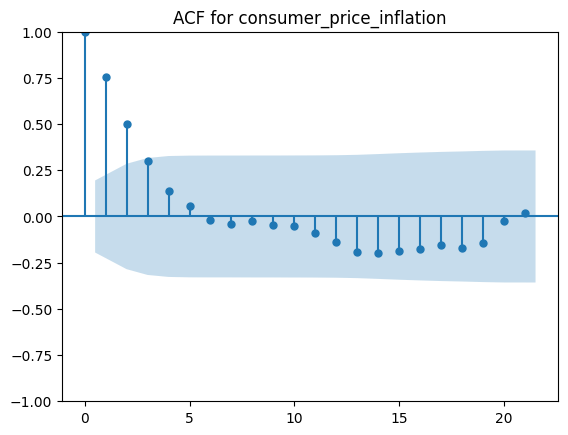

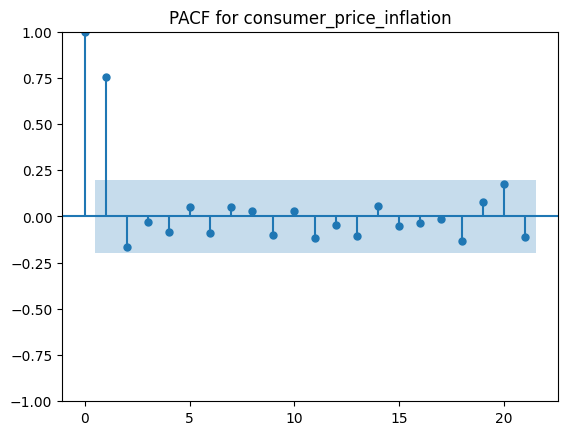

In [35]:
variables = ['realGDP', 'unemployment_rate', 'consumer_price_inflation']
for var in variables:
    series = df[var].dropna()
    print(f'ACF for {var}: {acf(series)}')
    print(f'PACF for {var}: {pacf(series)}')

    plot_acf(series, title=f'ACF for {var}')
    plt.show()
    plot_pacf(series, title=f'PACF for {var}')
    plt.show()

38) Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion.

sol1: Parsimonious Model: A model with as few parameters as possible for capturing any desired features.

sol2 : 

The principle of parsimony, also known as Occam's razor, is a philosophical and scientific principle that suggests that among competing hypotheses or explanations, the simplest one is often the best. In other words, when faced with multiple explanations that account for the same observations, the one that requires the fewest assumptions is generally preferred. Simplicity, elegance, and economy in explanation are considered virtues in scientific reasoning.

Ockham's razor, named after the medieval philosopher William of Ockham, is a specific formulation of the principle of parsimony. It states, "Entities should not be multiplied without necessity." This means that one should not introduce more assumptions, variables, or complexities into a theory than are absolutely needed to explain the observed phenomena.

In the context of statistical modeling and model selection, the principle of parsimony is closely related to information criteria. Information criteria are statistical measures used to assess the quality of different models. They balance the goodness of fit of a model with its complexity, penalizing models that are too complex.

Two commonly used information criteria are:

    Akaike Information Criterion (AIC):
        AIC balances the fit of the model (capturing the data well) with its complexity.
        A lower AIC value indicates a better trade-off between goodness of fit and simplicity.
        AIC = -2 * log-likelihood + 2 * number of parameters.

    Bayesian Information Criterion (BIC):
        Similar to AIC but places a stronger penalty on models with more parameters.
        BIC = -2 * log-likelihood + log(sample size) * number of parameters.

Application:

    When comparing different models using information criteria, the principle of parsimony is implicitly applied.
    The model with the lowest AIC or BIC is favored because it achieves a good fit while penalizing excessive complexity.


39) Explain the problem of auto-correlation of the errors.

40) Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors.

41) Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40.

42) For all variables, construct their lag 1 and lag 2 variables.

43) Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why?

44) State and test the no-Granger causality hypothesis of unemployment on GDP at the 1% level

45) Divide the sample in two groups: 1900-1960 and 1961-2000. Test the stability of coefficients between the two periods.

46) Test the structural breakpoint using a trim ratio of 30% at the 1% level